In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


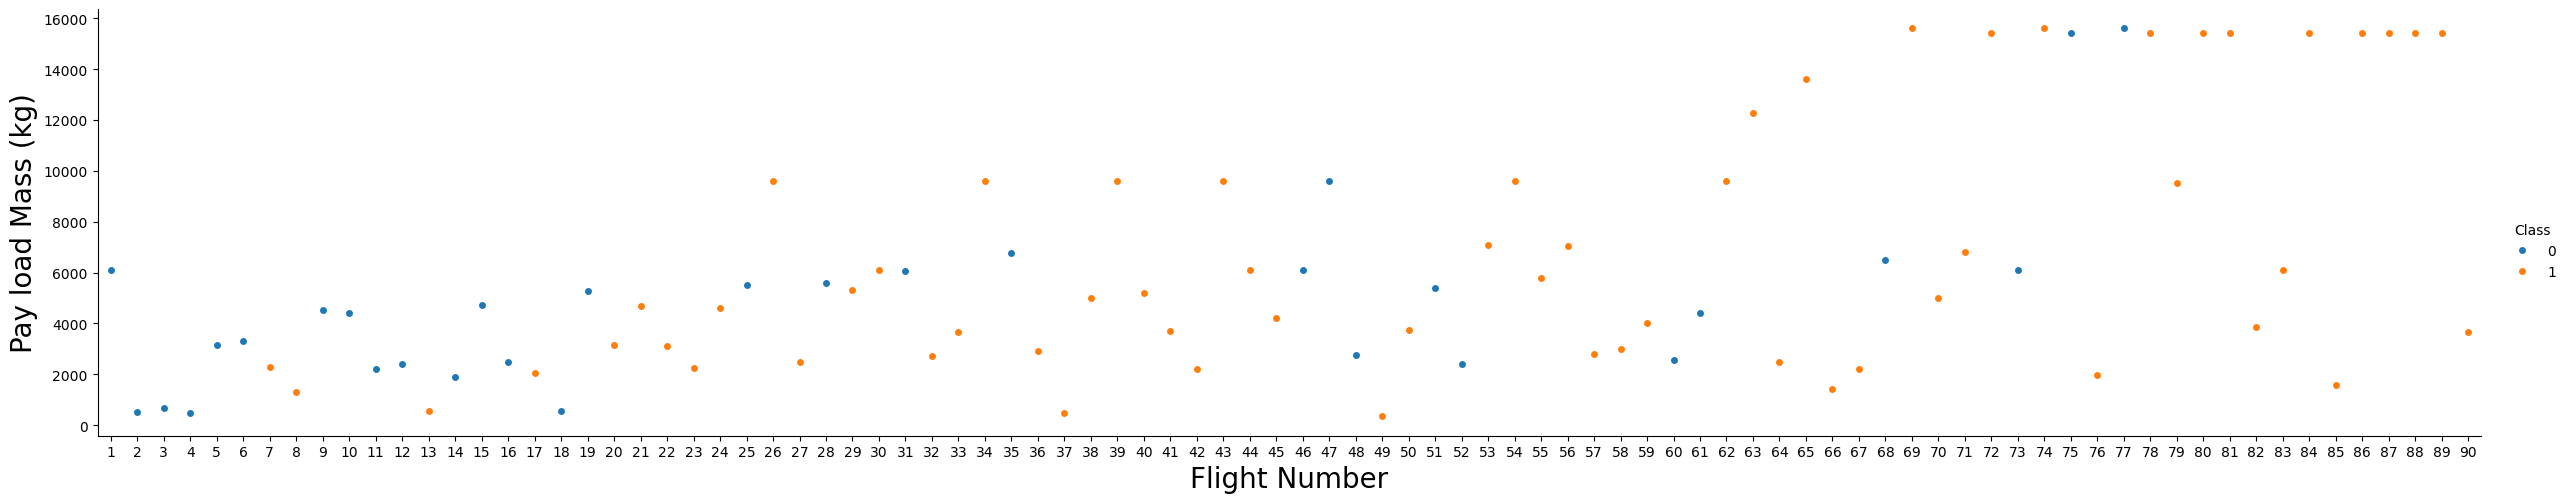

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

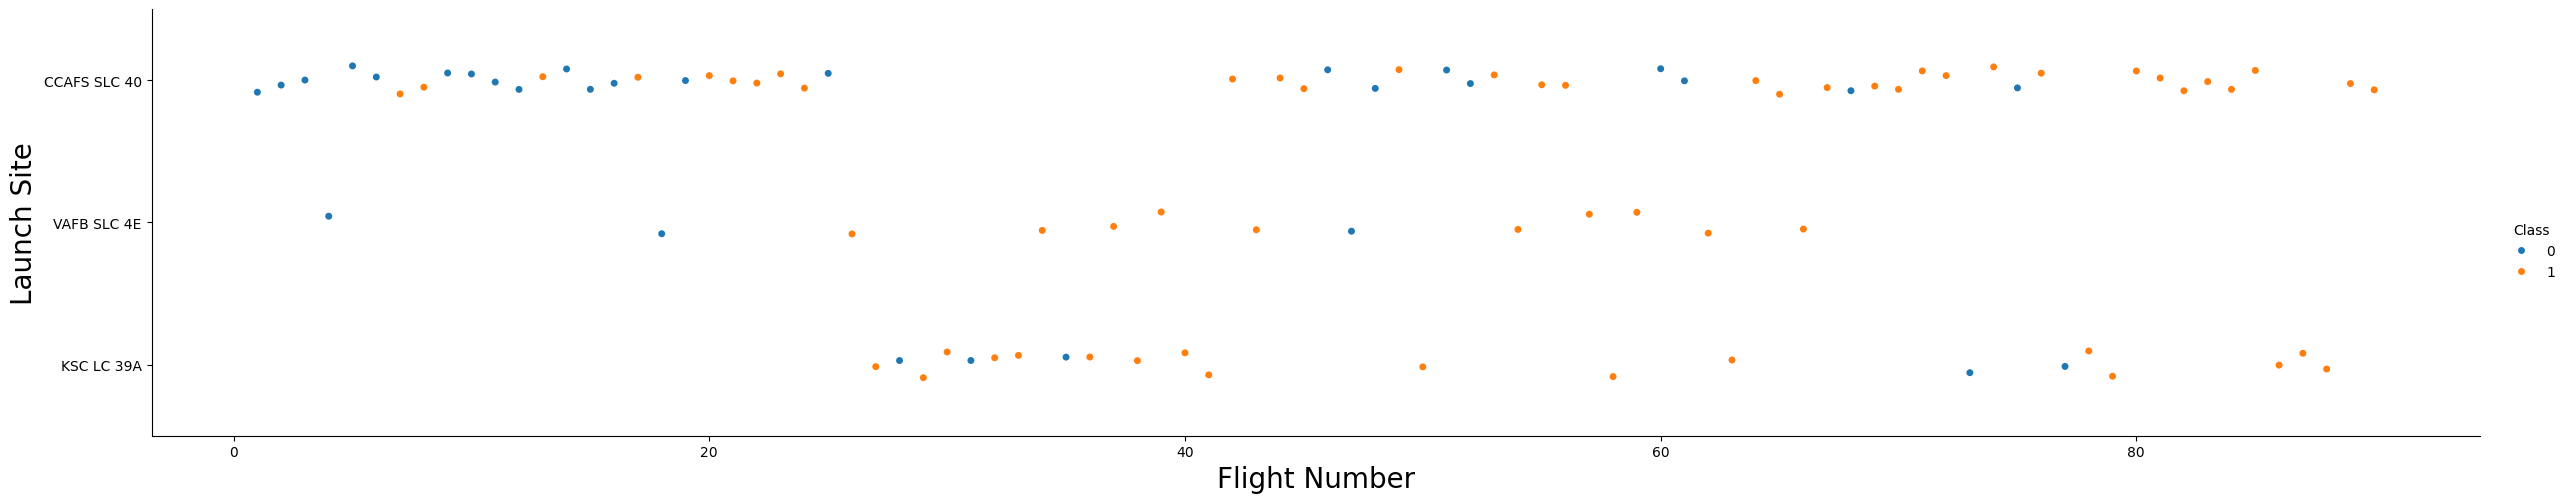

In [6]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

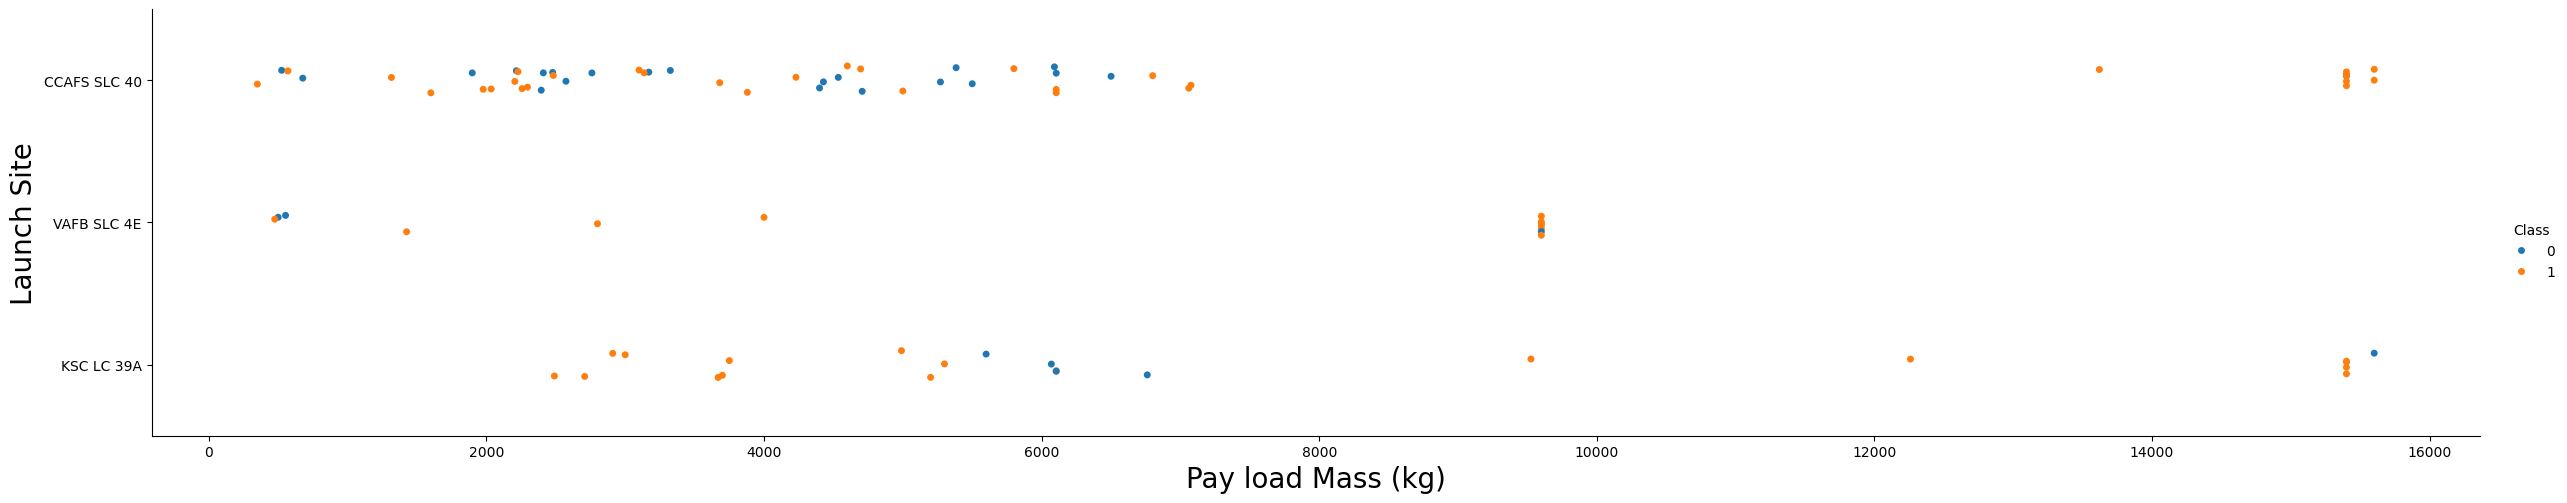

In [7]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

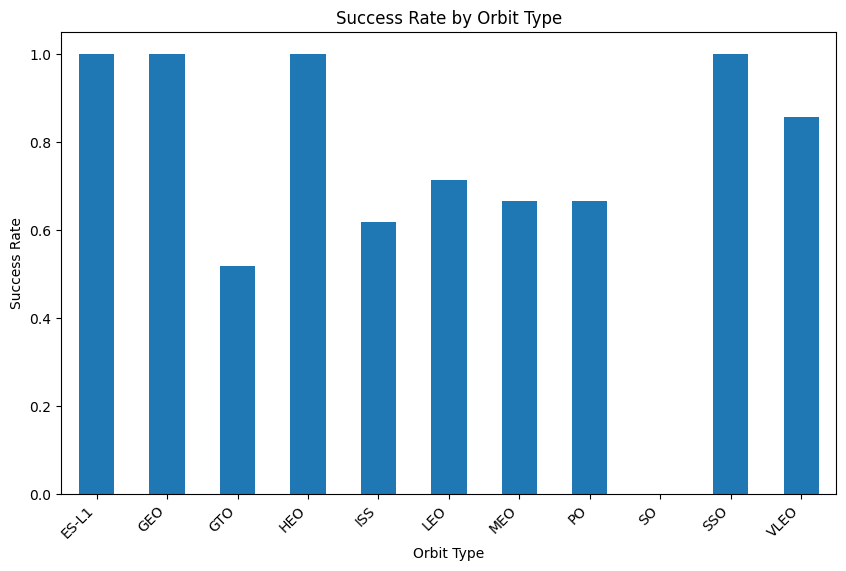

In [8]:
# Calculate the success rate for each orbit type
orbit_success = df.groupby('Orbit')['Class'].mean()

# Create a bar chart
orbit_success.plot(kind='bar', figsize=(10, 6))  # Adjust figsize as needed
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.title("Success Rate by Orbit Type")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

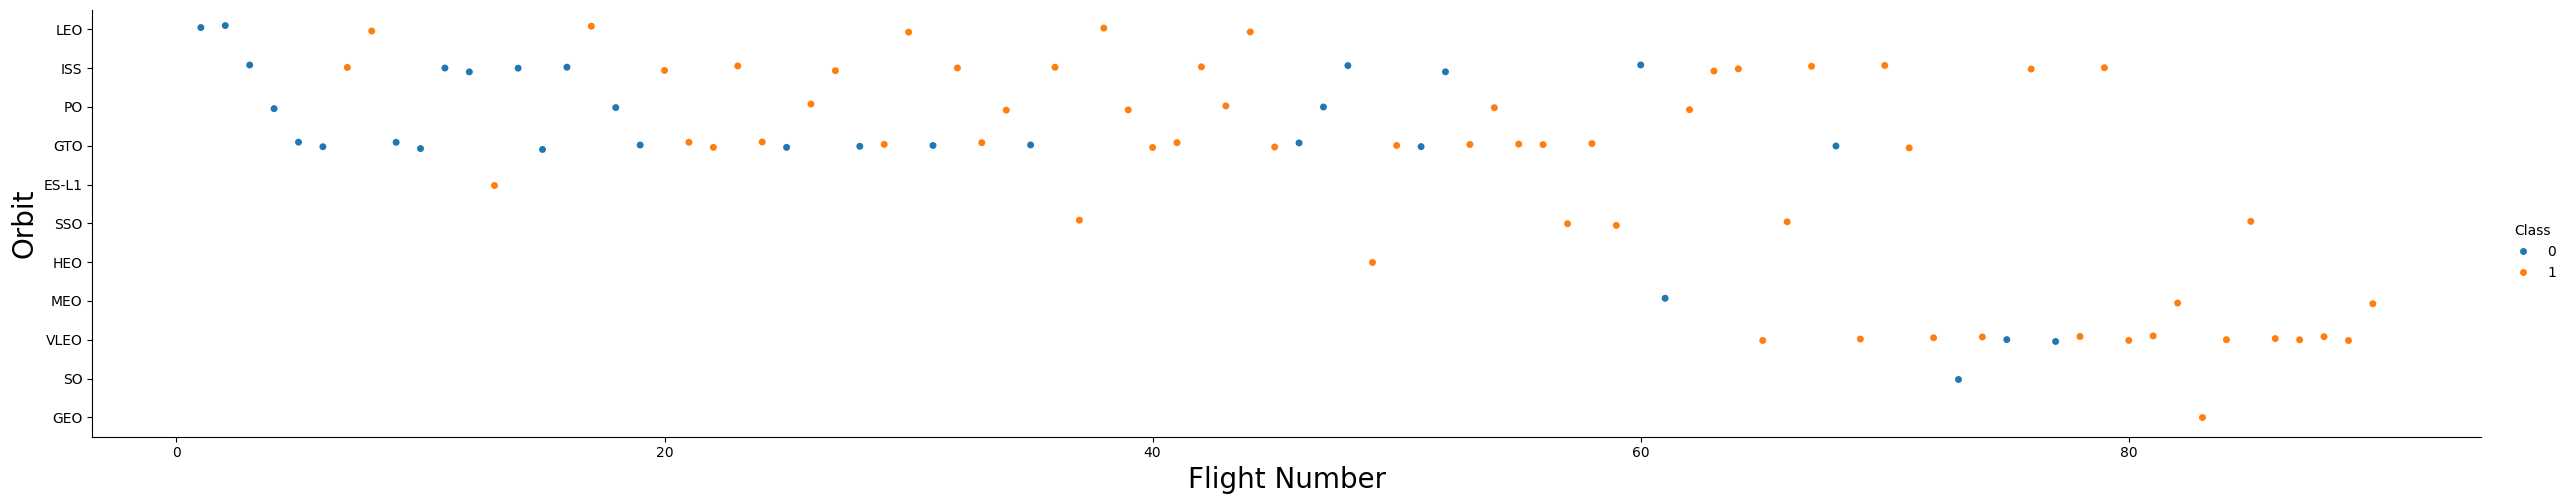

In [9]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

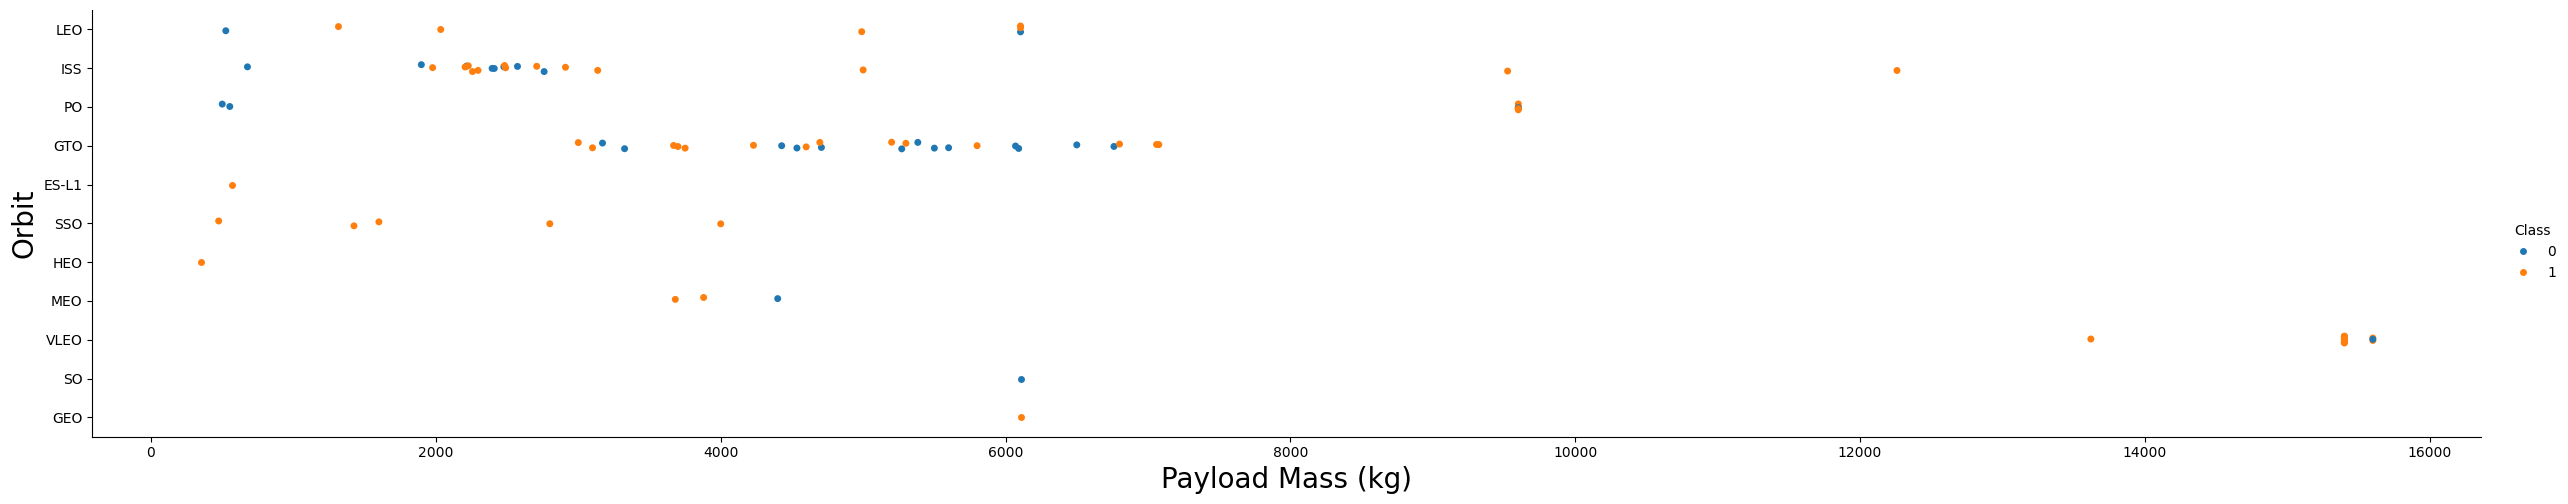

In [10]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

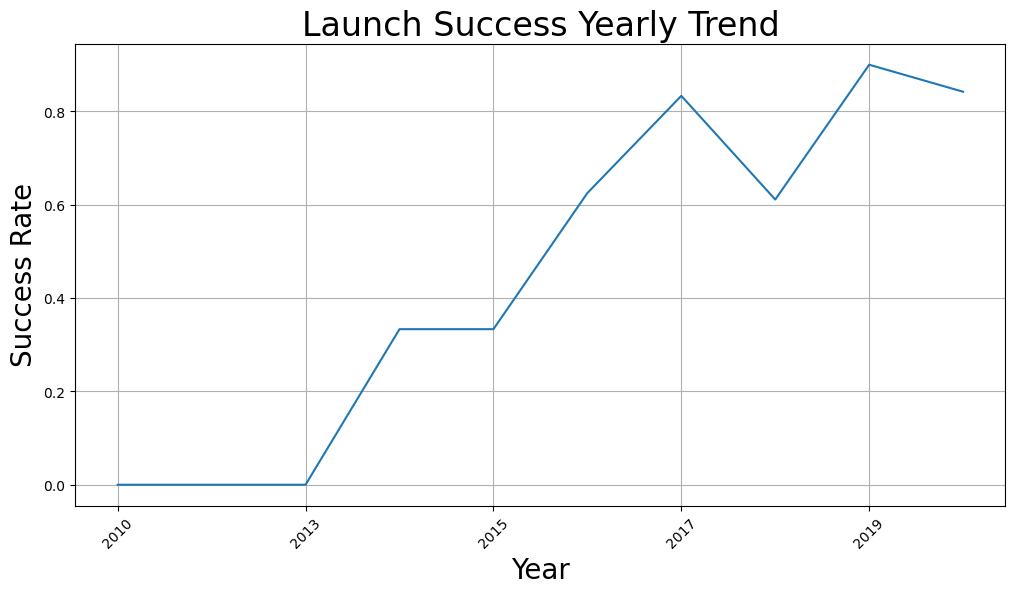

In [11]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year(df['Date'])
df['Year'] = year

# Calculate the average success rate per year
success_rate_year = df.groupby('Year')['Class'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
success_rate_year.plot(kind='line')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Launch Success Yearly Trend", fontsize=24)
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.grid(True)  # Add grid lines for visual clarity
plt.show()

In [12]:
# List of categorical columns to create dummies for
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Use pd.get_dummies to create dummy variables
features_one_hot = pd.get_dummies(df[categorical_cols], drop_first=True) # Use drop_first to avoid multicollinearity

# Concatenate the dummy variables with the rest of the features
features = df[['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs']]  # Include numerical features
features_one_hot = pd.concat([features, features_one_hot], axis=1)

# Display the head of the resulting DataFrame
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Orbit_GEO  \
0             1  6104.959412        1     False   False  False      False   
1             2   525.000000        1     False   False  False      False   
2             3   677.000000        1     False   False  False      False   
3             4   500.000000        1     False   False  False      False   
4             5  3170.000000        1     False   False  False      False   

   Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1048  Serial_B1049  \
0      False      False      False  ...         False         False   
1      False      False      False  ...         False         False   
2      False      False       True  ...         False         False   
3      False      False      False  ...         False         False   
4       True      False      False  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False      

In [13]:
features_one_hot = features_one_hot.astype('float64')

# Verify the data types
print(features_one_hot.dtypes)

# Export the DataFrame to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 74, dtype: object
